'found rect'

'filled'

(1087, 333, 1259, 438)

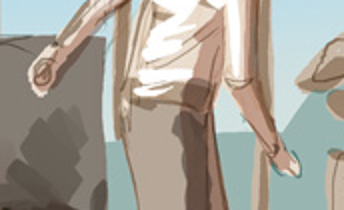

'found rect'

'filled'

(163, 418, 321, 507)

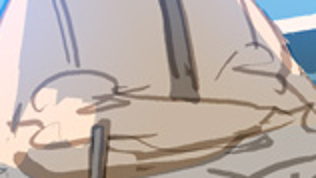

In [28]:
from PIL import Image
from IPython.display import display

def point_inside_rect(point: tuple[int, int], rect: tuple[int, int, int, int]):
    return point[0] >= rect[0] - 5 and point[1] >= rect[1] - 5 and point[0] <= rect[2] + 5 and point[1] <= rect[3] + 5
with Image.open("../data/img/post3.png") as im:
        px = im.load()
        rects = []
        top = 0
        for i in range(0, 3):
            topleft_corner_candidate: tuple[int, int] = None
            topright_corner_candidate: tuple[int, int] = None
            width, height = im.size
            found_rect = False
            rect = None
            consecutive_pixels = 0
            for y in range(top, height-1):
                if found_rect:
                    break
                for x in range(0, width-1):
                    if found_rect:
                        break
                    if px[x, y] == (255, 0, 0) and len(list(filter(lambda rect : point_inside_rect((x, y), rect), rects))) == 0:
                        if topleft_corner_candidate == None:
                            topleft_corner_candidate = (x, y)
                        else:
                            topright_corner_candidate = (x, y)
                        consecutive_pixels += 1
                    else:
                        if consecutive_pixels >= 25:
                            display("found rect")
                            found_rect = True
                            top = y-1
                            break
                        # false alarm
                        consecutive_pixels = 0
                        topleft_corner_candidate = None
                        topright_corner_candidate = None
            if found_rect:
                for y in range(topleft_corner_candidate[1]+5, height-1):
                    filled = True
                    for x in range(topleft_corner_candidate[0], topright_corner_candidate[0]):
                        if px[x, y] != (255, 0, 0):
                            filled = False
                            break
                    if filled:
                        display("filled")
                        rect = (
                            topleft_corner_candidate[0] + 5, 
                            topleft_corner_candidate[1] + 5, 
                            topright_corner_candidate[0] - 5,
                            y - 1
                        )
                        break
                display(rect)
                cropped = im.crop(rect)
                display(cropped.resize((cropped.size[0]*2, cropped.size[1]*2)))
                rects.append(rect)

                        